In [2044]:
#iMPORT ALL IMPORTANT MODULES REQUIRED FOR THE MODEL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import (mean_absolute_error, r2_score, mean_squared_error, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, davies_bouldin_score,
                           silhouette_score, calinski_harabasz_score, roc_curve, auc, 
                             plot_confusion_matrix, ConfusionMatrixDisplay)

from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as Feature
from mlxtend.plotting import plot_sequential_feature_selection
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  (accuracy_score, classification_report, confusion_matrix, 
                             ConfusionMatrixDisplay,plot_roc_curve, roc_auc_score )
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.cluster import KMeans


In [2045]:
#import data the video game data
gamedata = pd.read_csv('videogames.csv')

In [2046]:
#view top 5 record
gamedata.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [2047]:
#check for null value in the data
gamedata.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [2048]:
#check a description of the data frame
gamedata.describe(include='all')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,16717,16719,16450.000000,16717,16665,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,10015,7590.000000,10096,9950
unique,11562,31,NaN,12,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1696,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E
freq,12,2161,NaN,3370,1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2425,NaN,204,3991
mean,NaN,NaN,2006.487356,NaN,NaN,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,NaN,162.229908,NaN,NaN
std,NaN,NaN,5.878995,NaN,NaN,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,NaN,561.282326,NaN,NaN
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,NaN,4.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,NaN,10.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,NaN,24.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,NaN,81.000000,NaN,NaN


In [2049]:
#checck the description of the object records in the dataframe
description = gamedata.describe(include = 'object')
description

,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
count,16717,16719,16717,16665,10015,10096,9950
unique,11562,31,12,581,96,1696,8
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts,tbd,Ubisoft,E
freq,12,2161,3370,1356,2425,204,3991


### Data Cleaning

In [2050]:
#i would be dropping the 2 Genre column since the two record have little effect on my model
gamedata.dropna(subset= ['Genre'], inplace = True)
gamedata.reset_index(drop=True, inplace = True)

###### user score was represented with tbd in a column meant to be represented with number

In [2051]:
#checking the critic score summary statistics
gamedata['Critic_Score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64

In [2052]:
#use 1 to fill all null value in critic score and critic count value
gamedata['Critic_Score'].fillna(1, inplace = True)
gamedata['Critic_Count'].fillna(1, inplace = True)

In [2053]:
#convert the tbd value to nan value and check the summary statistics of column
gamedata['User_Score'].replace('tbd',np.nan, inplace = True)
gamedata['User_Score'] = gamedata['User_Score'].astype(float)
gamedata['User_Score'].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: User_Score, dtype: float64

In [2054]:
#use the mean of the user score column to fill empty column
gamedata['User_Score'].fillna(gamedata['User_Score'].mean(), inplace = True)

In [2055]:
#check the summary statistic of the user count variable
gamedata['User_Count'].describe()

count     7590.000000
mean       162.229908
std        561.282326
min          4.000000
25%         10.000000
50%         24.000000
75%         81.000000
max      10665.000000
Name: User_Count, dtype: float64

In [2056]:
#fill null value of the user count with 0
gamedata['User_Count'].fillna(0,inplace = True)

In [2057]:
#fill the rating field with null value with unavailable
gamedata['Rating'].fillna('Unavailable', inplace = True)

### Selecting the top platforms in the data

In [2058]:
#grouping the platform with less than 950 together
platform_count = gamedata['Platform'].value_counts()

# selecting platform with more than 950 counts
platform_limit = 950

select_platform = platform_count[platform_count.values >= platform_limit].index.tolist()
gamedata.loc[~gamedata['Platform'].isin(select_platform), 'Platform'] = 'Others'
gamedata['Platform'].value_counts()

Others    5111
PS2       2161
DS        2152
PS3       1331
Wii       1320
X360      1262
PSP       1209
PS        1197
PC         974
Name: Platform, dtype: int64

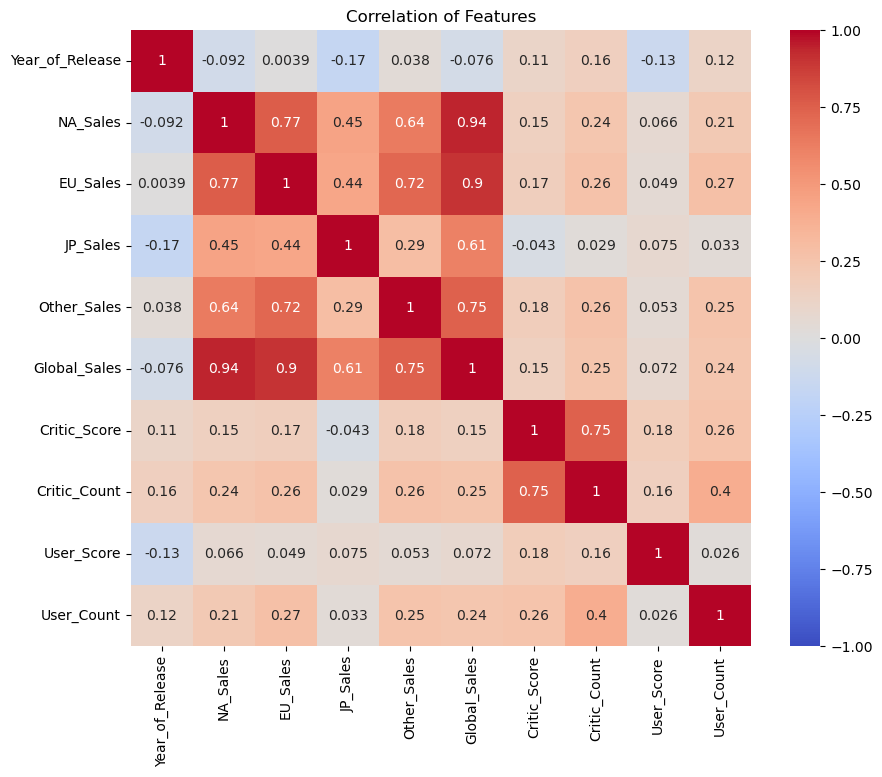

In [2059]:
#plot an heat map to showw the correlation and contribution of each numerical variable to the data
numerical_vars = gamedata.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation = numerical_vars.corr()

# Create a heatmap using the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, vmin = -1, vmax=1, cmap='coolwarm')
plt.title('Correlation of Features')

# Show the plot
plt.show()

In [2060]:
#multi colinearity was observed within the variable

### Checking for Outliers using BoxPlot

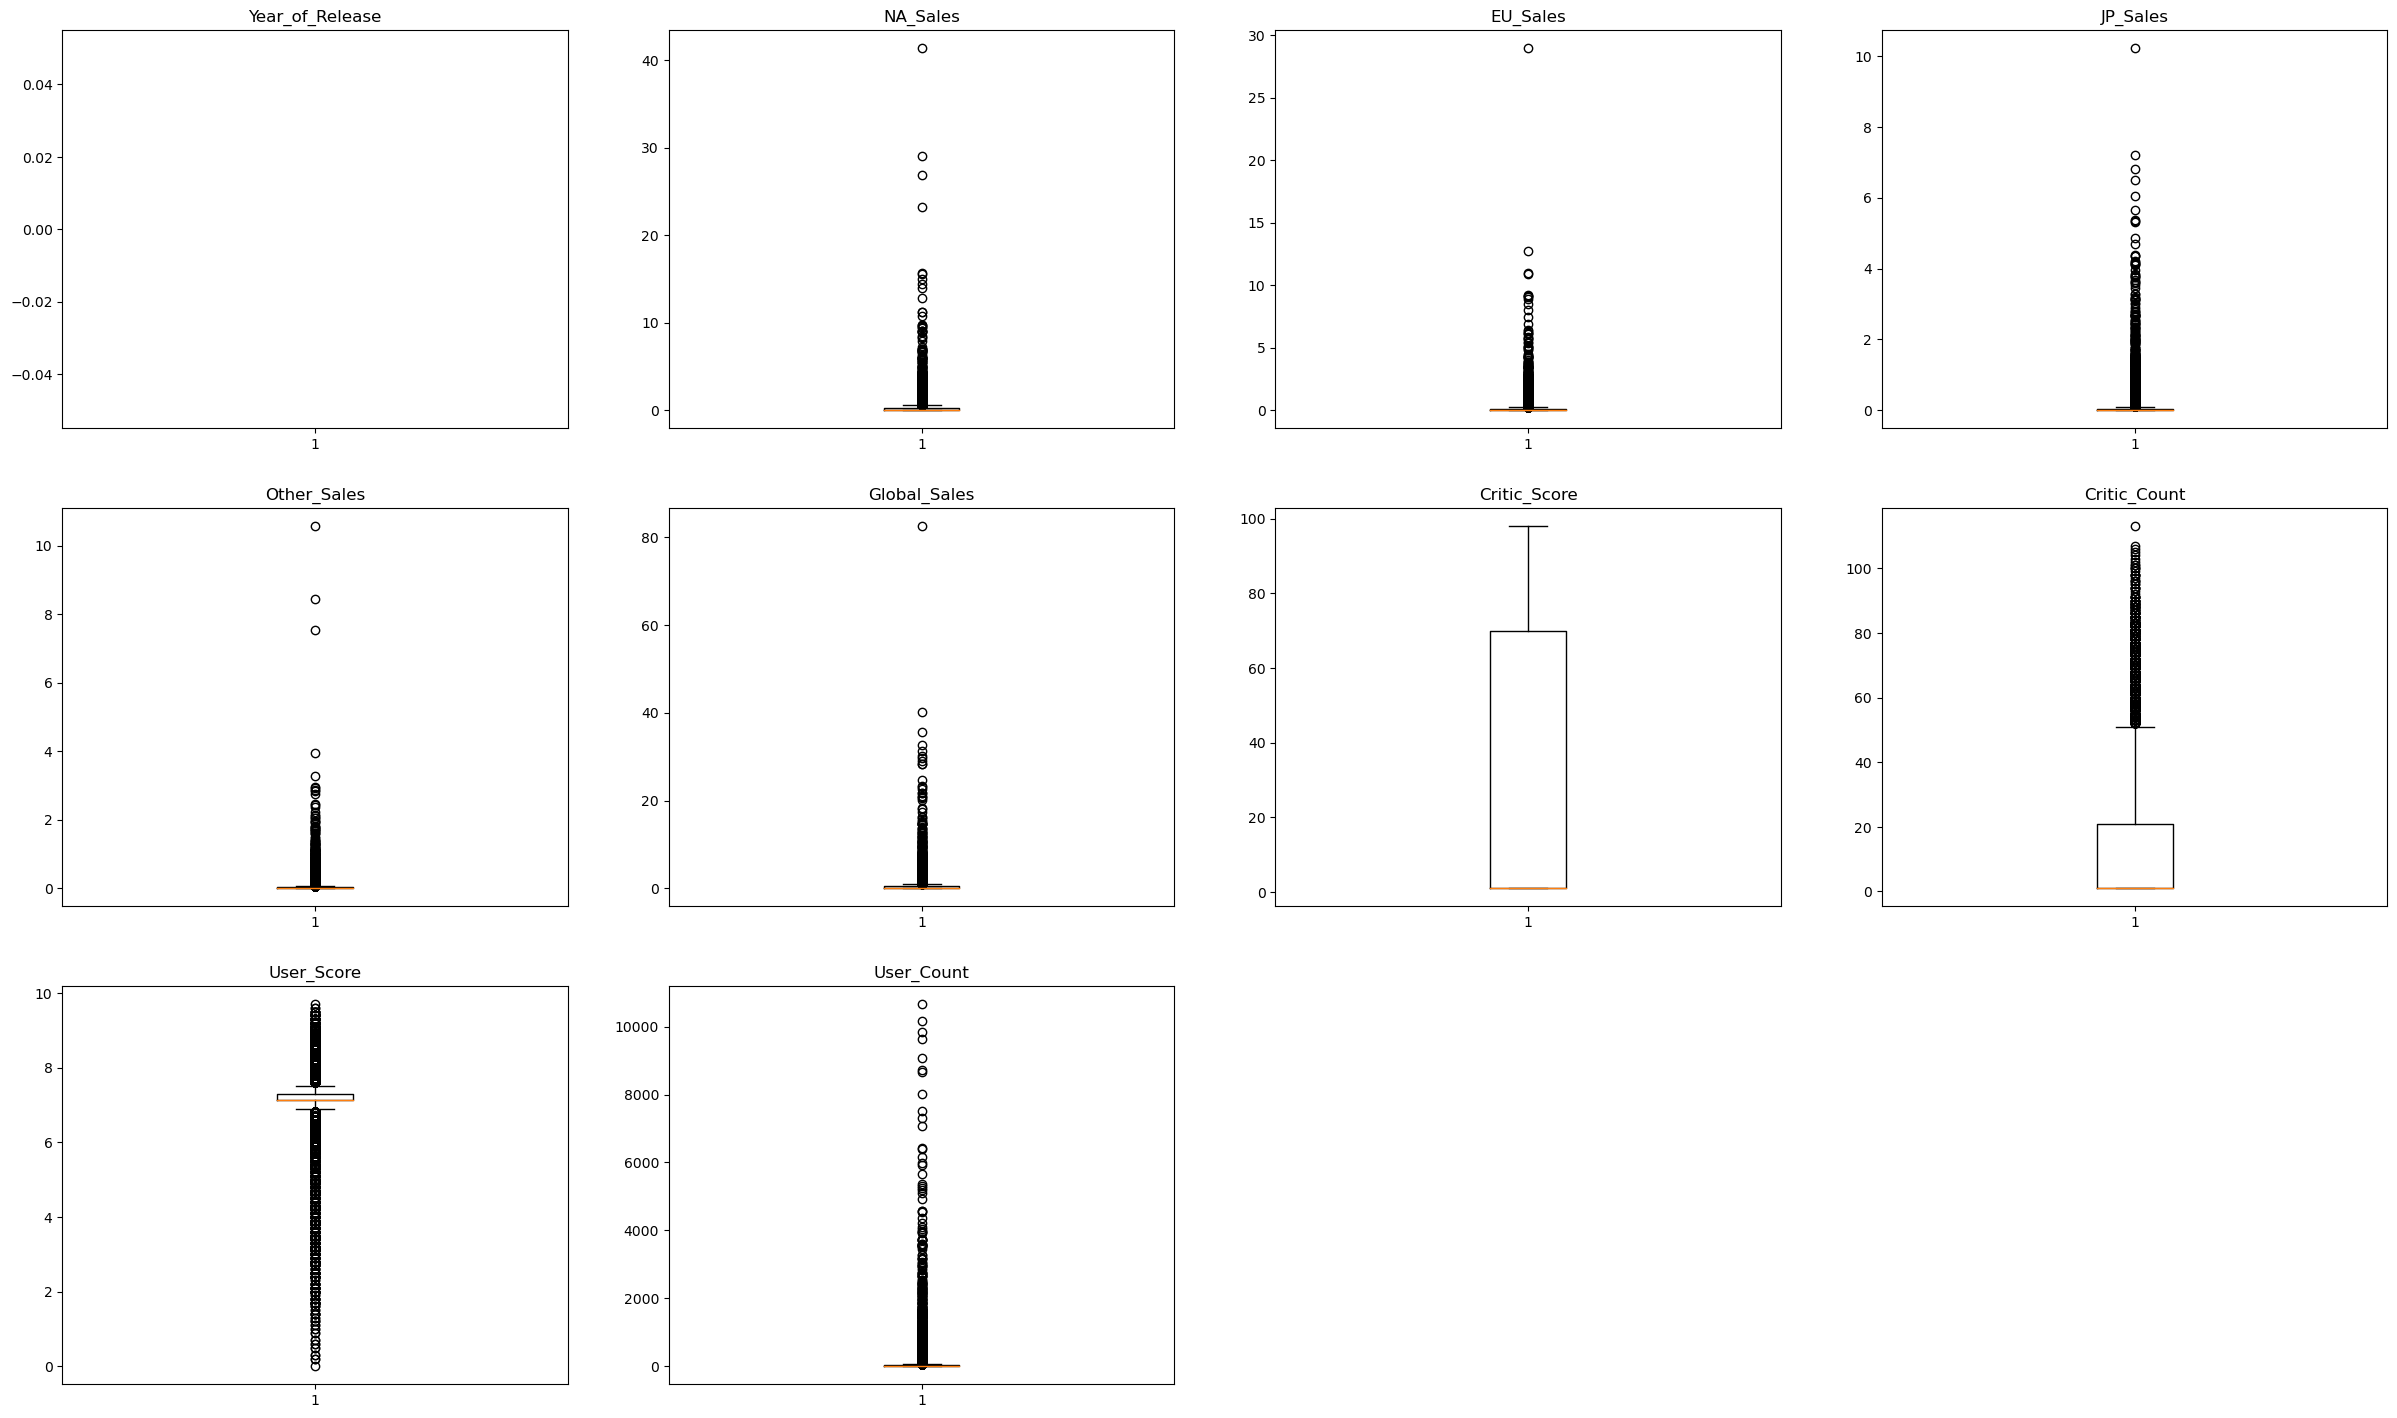

In [2061]:
plt.figure(figsize = (30,30))
for num, column in enumerate(numerical_vars):
    plt.subplot(5,4,num + 1)
    plt.boxplot(x=numerical_vars[column])
    plt.title(column)

### Treating the outliers in the gamedata for all numerical and float

In [2062]:

# Define a function to treat outliers
def outliers_clip(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    bound = 1.5
    lower_bound = q1 - bound * iqr
    upper_bound = q3 + bound * iqr
    return column.clip(lower=lower_bound, upper=upper_bound)


# Iterate through each column and treat outliers and transforming the target column
column_target = 'Global_Sales'

for rec in gamedata.columns:
    if gamedata[rec].dtype in ['int64', 'float64'] and rec != column_target:
        gamedata[rec] = outliers_clip(gamedata[rec])
gamedata[column_target] = np.log(gamedata[column_target]) + 1e-4

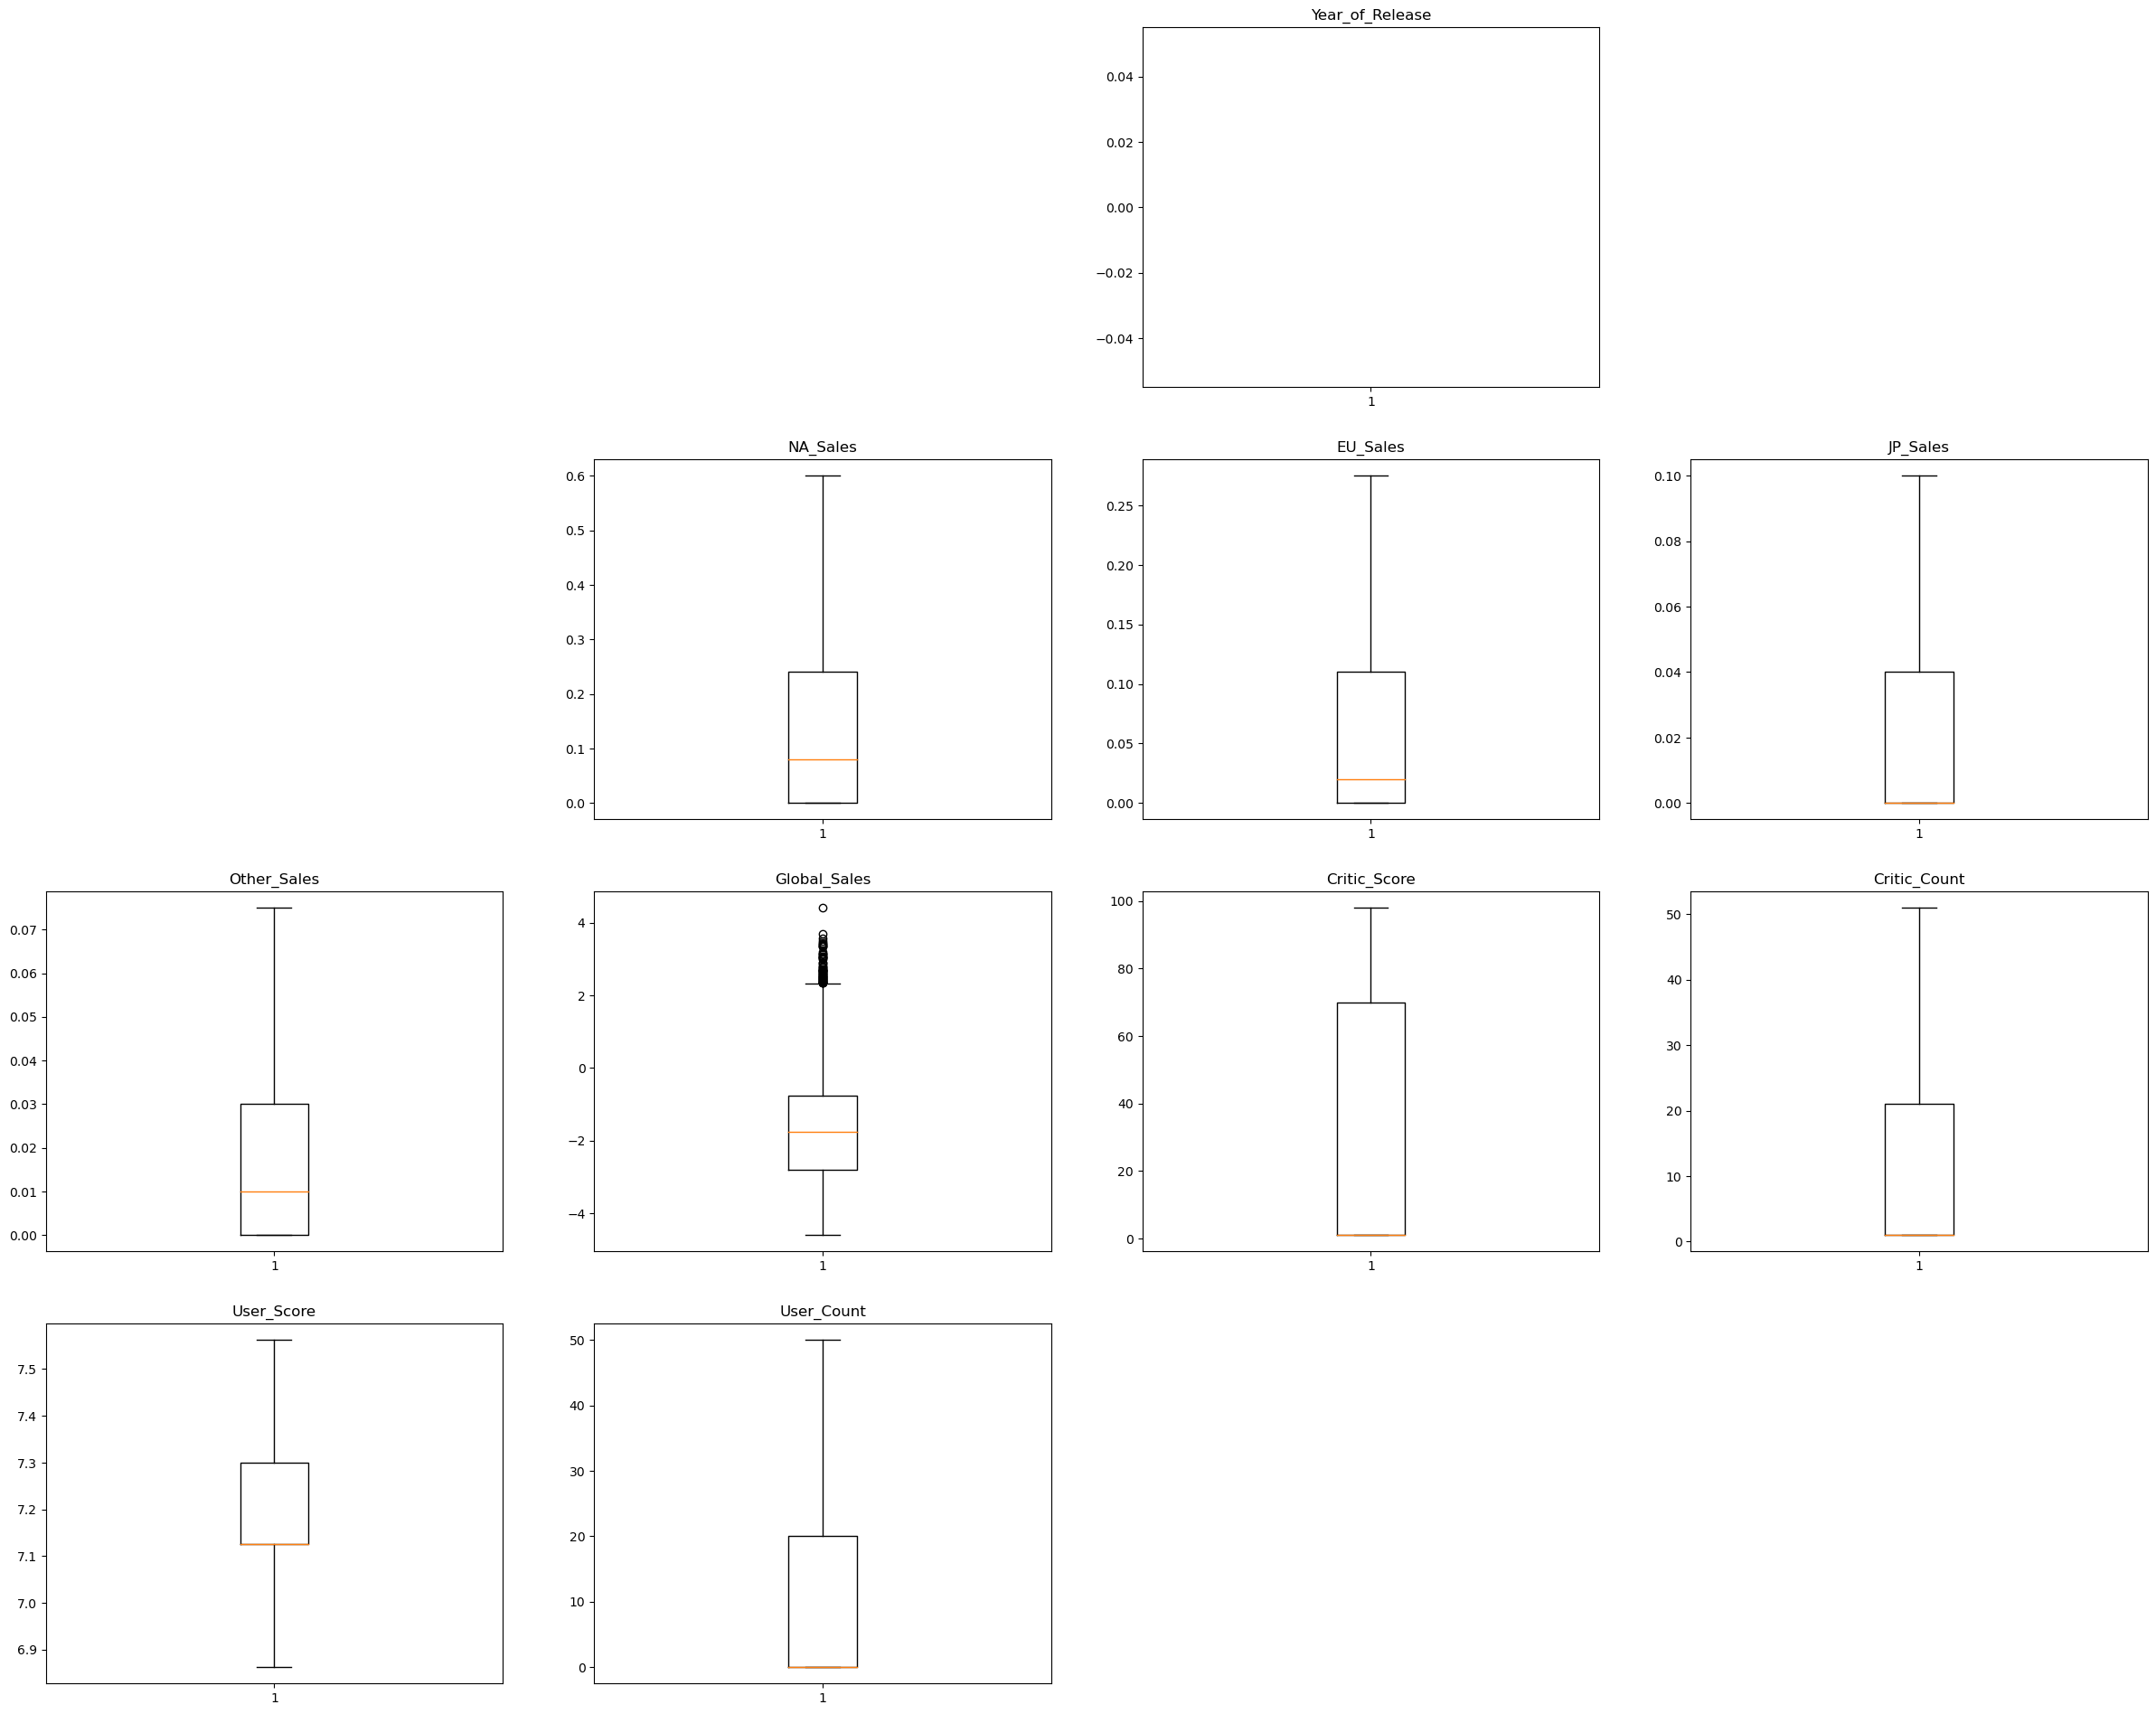

In [2063]:
#plot graph to recheck of outliers have been treated
plt.figure(figsize = (30,30))
for num, column in enumerate(gamedata):
    if gamedata[column].dtype in ['int64', 'float64']:
        plt.subplot(5,4,num + 1)
        plt.boxplot(x=gamedata[column])
        plt.title(column)

In [2066]:
#drop duplicated record
gamedata.drop_duplicates(inplace = True)
gamedata.shape

(16712, 16)

### Building the Linear Model

In [2067]:
#selecting the features for my model and the target variable
gamedata_features = ['Platform', 'Genre', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Rating']
x = gamedata.loc[:, gamedata_features]

y = gamedata['Global_Sales']

In [2068]:
#covert all categorical data using 1 hot encoding
x = pd.get_dummies(x, drop_first = True)
x.sample(5)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Platform_Others,Platform_PC,...,Genre_Sports,Genre_Strategy,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T,Rating_Unavailable
4411,0.25,0.170,0.00,0.03,1.0,1.0,7.125046,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
11320,0.05,0.030,0.00,0.01,1.0,1.0,7.125046,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
5565,0.13,0.140,0.00,0.06,44.0,30.0,6.862615,23.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1679,0.40,0.275,0.10,0.04,1.0,1.0,7.125046,0.0,1,0,...,0,0,0,0,0,0,0,0,0,1
8117,0.11,0.000,0.05,0.01,1.0,1.0,7.125046,0.0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [2069]:
#spliting the data into training, testing and validation set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1 )

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [2070]:
#scaling the features using standard scaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

### Implementing Linear Regression Model

In [2071]:
#Building the linear model
model = LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [2072]:
#prediciting the model outcome
y_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test_scaled)

### Evaluating the model

In [2073]:
#function to help in evaluating model

def evaluate_models(train, pred):
    # Calculate performance metrics
    mae = mean_absolute_error(train, pred)
    mse = mean_squared_error(train, pred)
    rmse = mean_squared_error(train, pred, squared=False)
    r2 = r2_score(train, pred)
    n = len(train)
    p = x_train.shape[1]
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    mape = np.mean(np.abs(train - pred) / train) * 100
    
    # Create a dataframe with the performance metrics
    feature_evaluation = pd.DataFrame({
        'MAE': [mae],
        'MSE': [mse],
        'RMSE': [rmse],
        'R2': [r2],
        'ADJ-R2': [adjusted_r2],
        'MAP%': [mape]
    })
    
    # Print the updated dataframe
    print(feature_evaluation)


In [2074]:
#evaluate model using training dataset
evaluate_models(y_train,y_pred)

        MAE       MSE      RMSE        R2    ADJ-R2        MAP%
0  0.489326  0.390759  0.625108  0.817594  0.816995  621.593891


In [2075]:
#evaluate model using testing dataset
evaluate_models(y_test,y_test_pred)

        MAE       MSE      RMSE        R2    ADJ-R2         MAP%
0  0.491021  0.393905  0.627618  0.819012  0.817096  1746.065591


### Implement the ridge regressor

In [2076]:
#develop the ridge regression model and fit the model
ridge_model = Ridge(random_state = 1, alpha = 1)
ridge_model.fit(x_train_scaled,y_train)

Ridge(alpha=1, random_state=1)

In [2077]:
#predict the train and test outcome of the model
ridge_pred = ridge_model.predict(x_train_scaled)
ridge_test_pred = ridge_model.predict(x_test_scaled)

In [2078]:
#evaluate model using training dataset
evaluate_models(y_train,ridge_pred)

        MAE      MSE      RMSE        R2    ADJ-R2        MAP%
0  0.489325  0.39076  0.625108  0.817594  0.816995  621.468194


In [2079]:
#evaluate model using testing dataset
evaluate_models(y_test,ridge_test_pred)

        MAE       MSE      RMSE        R2    ADJ-R2         MAP%
0  0.491014  0.393902  0.627616  0.819013  0.817098  1745.755839


### Implement Randomforest

In [2080]:
rf_reg = RandomForestRegressor(random_state=42, max_depth = 14)

In [2081]:
rf_reg.fit(x_train_scaled, y_train)

RandomForestRegressor(max_depth=14, random_state=42)

In [2082]:
predicted = rf_reg.predict(x_train_scaled)

In [2083]:
evaluate_models(y_train,predicted)

        MAE       MSE      RMSE        R2    ADJ-R2        MAP%
0  0.091909  0.040221  0.200552  0.981225  0.981163  107.429065


In [2084]:
predicted_test = rf_reg.predict(x_test_scaled)
evaluate_models(y_test,predicted_test)

        MAE       MSE      RMSE        R2    ADJ-R2        MAP%
0  0.137254  0.075495  0.274764  0.965312  0.964945  863.273176


### select the most important features in the dataset that best predict the global sale

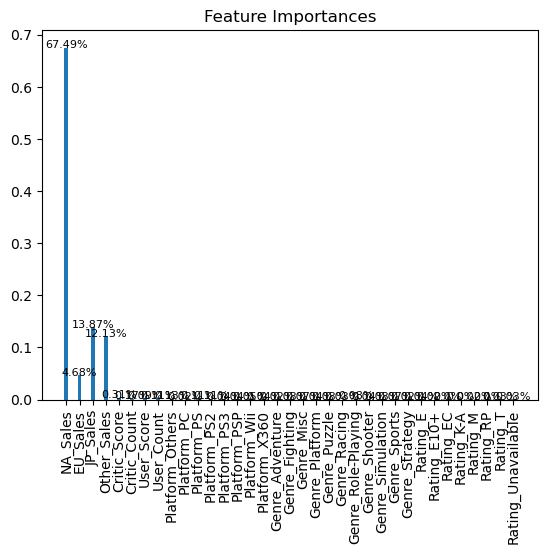

In [2085]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(rf_reg, threshold='mean', prefit=True)
selector_indices = selector.get_support(indices=True)

# Get feature importances and names
importances = rf_reg.feature_importances_
feature_names = x_train.columns

# Plot feature importances
plt.bar(range(len(importances)), importances, width=0.3)
plt.xticks(range(len(importances)), feature_names, rotation=90)
plt.title("Feature Importances")
for i, v in enumerate(importances):
    plt.text(i, v, str(round(v*100, 2))+"%", ha='center', fontsize=8)
plt.show()


### Implement Gradient Boosting

In [2086]:
gbl = GradientBoostingRegressor(random_state = 64, learning_rate = 0.2)
gbl.fit(x_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.2, random_state=64)

In [2087]:
predicter = gbl.predict(x_train_scaled)
evaluate_models(y_train,predicter)

        MAE       MSE      RMSE        R2    ADJ-R2        MAP%
0  0.155253  0.072612  0.269467  0.966105  0.965993  114.213836


In [2088]:
predicter_test = gbl.predict(x_test_scaled)
evaluate_models(y_test,predicter_test)

        MAE       MSE     RMSE        R2    ADJ-R2         MAP%
0  0.156201  0.075598  0.27495  0.965265  0.964897  1058.295931


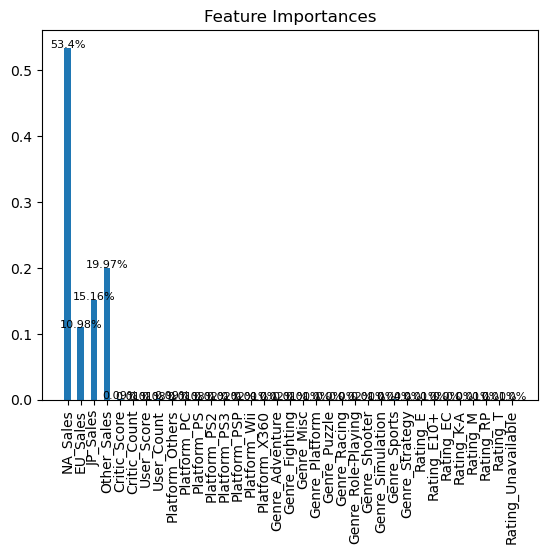

In [2089]:
# Get feature importances and names
importancess = gbl.feature_importances_
feature_namess = x_train.columns

# Plot feature importances
plt.bar(range(len(importancess)), importancess, width=0.5)
plt.xticks(range(len(importancess)), feature_names, rotation=90)
plt.title("Feature Importances")
for i, v in enumerate(importancess):
    plt.text(i, v, str(round(v*100, 2))+"%", ha='center', fontsize=8)
plt.show()

### Building Classification Model to Classify the Dataset

In [2090]:
#inspect the target variable platform
gamedata['Platform'].value_counts()

Others    5106
PS2       2161
DS        2152
PS3       1331
Wii       1320
X360      1262
PSP       1209
PS        1197
PC         974
Name: Platform, dtype: int64

### Implement a gradient boosting classifier using platform as target variable

In [2091]:
#select the relevant categorical and non categorical variable in the dataset
x_plat = gamedata[['NA_Sales','Genre','Rating','EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count','Global_Sales']]
y_plat = gamedata['Platform']

In [2092]:
# use one auth encoding to coverget the categorical variable in the dataset
x_plat = pd.get_dummies(x_plat, drop_first = True)

In [2093]:
#use a label encoder to convert the target variable
label_encoder = LabelEncoder()
y_plat = label_encoder.fit_transform(y_plat)

In [2094]:
#apply smooth to the dataset to prevent oversampling
plat_sm = SMOTE(random_state=42)
xplat_sample, yplat_sample = gen_sm.fit_resample(x_plat,y_plat)
x_plat,y_plat = xplat_sample,yplat_sample

In [2095]:
# Split the dataset into training and testing sets
x_plat_train, x_plat_test, y_plat_train, y_plat_test = train_test_split(x_plat, y_plat, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
x_plat_train, x_plat_val, y_plat_train, y_plat_val = train_test_split(x_plat_train, y_plat_train, test_size=0.2, random_state=42)


In [2096]:
#build and train your model
plat_model = GradientBoostingClassifier(learning_rate= 0.1, random_state= 42)
plat_model.fit(x_plat_train,y_plat_train)

GradientBoostingClassifier(random_state=42)

In [2097]:
#get model prediction on validation
val_predict = plat_model.predict(x_plat_val)

In [2098]:
#function to evaluate the model
def classevaluate(train,pred):
    print(classification_report(train,pred))
    print(confusion_matrix(train,pred))

In [2099]:
#get model prediction on training
train_predict = plat_model.predict(x_plat_train)

In [2100]:
#evaluate your model for training dataset
classevaluate(y_plat_train,train_predict)

              precision    recall  f1-score   support

           0       0.51      0.47      0.49      3273
           1       0.74      0.58      0.65      3276
           2       0.84      0.91      0.87      3255
           3       0.70      0.93      0.80      3308
           4       0.70      0.58      0.63      3225
           5       0.63      0.53      0.58      3270
           6       0.46      0.65      0.53      3317
           7       0.52      0.49      0.50      3258
           8       0.68      0.59      0.63      3228

    accuracy                           0.64     29410
   macro avg       0.64      0.64      0.63     29410
weighted avg       0.64      0.64      0.63     29410

[[1539  120   90  134   69   52  662  531   76]
 [ 173 1889  129  254   49  135  459   74  114]
 [  34   23 2963   95   13   24    3   25   75]
 [  32   38   14 3077   46    7   31   44   19]
 [ 104  170   40  192 1856  165  528   78   92]
 [ 111   81   81  146  176 1730  481  198  266]
 [ 315 

In [2101]:
#evaluate your model for validation dataset
classevaluate(y_plat_val,val_predict)

              precision    recall  f1-score   support

           0       0.50      0.44      0.46       816
           1       0.69      0.57      0.62       807
           2       0.84      0.92      0.88       821
           3       0.70      0.92      0.79       841
           4       0.64      0.55      0.59       826
           5       0.58      0.50      0.54       763
           6       0.44      0.62      0.51       823
           7       0.47      0.41      0.44       819
           8       0.65      0.56      0.60       837

    accuracy                           0.61      7353
   macro avg       0.61      0.61      0.60      7353
weighted avg       0.61      0.61      0.61      7353

[[355  39  29  36  16  15 158 146  22]
 [ 38 460  27  55   9  32 137  19  30]
 [  8   8 753  23   3   6   2   7  11]
 [  9  14   1 774  20   1  10   8   4]
 [ 18  57  10  60 454  55 110  35  27]
 [ 22  27  17  26  64 379 113  42  73]
 [ 81  28   0  17  45  77 508  48  19]
 [148  19  25  56  61 

### Implement a gradient boosting classifier using Genre as target variableegorical variable

In [2102]:
#inspect the target variable Genre
gamedata['Genre'].value_counts()

Action          3368
Sports          2348
Misc            1749
Role-Playing    1499
Shooter         1323
Adventure       1302
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [2103]:
# select relevant categorical and non categorical for your model
x_gen = gamedata[['NA_Sales','Platform','Rating','EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count','Global_Sales']]
y_gen = gamedata['Genre']

In [2104]:
#convert the categorical variables in x using oneauthencoding
x_gen = pd.get_dummies(x_gen, drop_first = True)

In [2105]:
#convert the y axis using label encoder
label_encoder = LabelEncoder()
y_gen = label_encoder.fit_transform(y_gen)

In [2106]:
#apply smoote to the dataset to avoid oversampling
gen_sm = SMOTE(random_state=42)
xgen_sample, ygen_sample = gen_sm.fit_resample(x_gen,y_gen)
x_gen,y_gen = xgen_sample,ygen_sample

In [2107]:
# Split the dataset into training and testing sets
x_gen_train, x_gen_test, y_gen_train, y_gen_test = train_test_split(x_gen, y_gen, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
x_gen_train, x_gen_val, y_gen_train, y_gen_val = train_test_split(x_gen_train, y_gen_train, test_size=0.2, random_state=42)


In [2108]:
#build your model
gen_model = GradientBoostingClassifier(learning_rate= 0.1, random_state= 42)

In [2109]:
#train your model
gen_model.fit(x_gen_train, y_gen_train)

GradientBoostingClassifier(random_state=42)

In [2110]:
#get prediction for your model on the training dataset
gen_train_predict = gen_model.predict(x_gen_train)

In [2111]:
#get prediction for your model on the validation dataset
gen_val_predict = gen_model.predict(x_gen_val)

In [2112]:
#evaluate your model using the training dataset
classevaluate(y_gen_train,gen_train_predict)

              precision    recall  f1-score   support

           0       0.42      0.31      0.35      2140
           1       0.38      0.45      0.41      2146
           2       0.38      0.40      0.39      2144
           3       0.35      0.28      0.31      2185
           4       0.35      0.53      0.42      2175
           5       0.42      0.56      0.48      2143
           6       0.35      0.34      0.34      2190
           7       0.33      0.42      0.37      2146
           8       0.55      0.43      0.48      2138
           9       0.44      0.28      0.34      2130
          10       0.55      0.35      0.42      2161
          11       0.43      0.47      0.45      2167

    accuracy                           0.40     25865
   macro avg       0.41      0.40      0.40     25865
weighted avg       0.41      0.40      0.40     25865

[[ 656  206  110  153  217   87  114  169  240   37   77   74]
 [  92  970   99  121  125  137   77  207   57   88   17  156]
 [  76 

In [2113]:
#evaluate your model using the validation dataset
classevaluate(y_gen_val,gen_val_predict)

              precision    recall  f1-score   support

           0       0.35      0.26      0.29       549
           1       0.37      0.43      0.40       546
           2       0.31      0.31      0.31       536
           3       0.33      0.25      0.28       511
           4       0.30      0.46      0.36       544
           5       0.40      0.56      0.47       562
           6       0.26      0.25      0.26       529
           7       0.29      0.36      0.32       573
           8       0.49      0.37      0.42       551
           9       0.36      0.20      0.25       545
          10       0.48      0.33      0.39       500
          11       0.35      0.41      0.38       521

    accuracy                           0.35      6467
   macro avg       0.36      0.35      0.35      6467
weighted avg       0.36      0.35      0.35      6467

[[140  51  36  38  59  27  33  40  71   8  24  22]
 [ 28 234  26  25  30  37  21  50  20  23   7  45]
 [ 27  58 168  10  60  12  29  

### Implement a gradient boosting classifier using Rating as target variable

In [2114]:
#Inspecting the target variable rating
gamedata['Rating'].value_counts()

Unavailable    6763
E              3990
T              2961
M              1563
E10+           1420
EC                8
K-A               3
RP                3
AO                1
Name: Rating, dtype: int64

In [2115]:
#selecting the necessary records in the rating columns to build the model
rat = gamedata[gamedata['Rating'].isin(['E','T','M','E10+'])]

In [2116]:
#select relevant categorical variable for your x and y 
x_rat = rat[['NA_Sales','Genre','Platform','EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count','Global_Sales']]
y_rat = rat['Rating']

In [2117]:
#convert categorical variable in x using oneauthencoding
x_rat = pd.get_dummies(x_rat, drop_first = True)

In [2118]:
#convert the categorical variables in y using labelencoder
label_encoders = LabelEncoder()
y_rat = label_encoders.fit_transform(y_rat)

In [2119]:
#implement smote to prevent data oversampling
rat_sm = SMOTE(random_state=42)
xrat_sample, yrat_sample = rat_sm.fit_resample(x_rat,y_rat)
x_rat,y_rat = xrat_sample,yrat_sample

In [2120]:
# Split the dataset into training and testing sets
x_rat_train, x_rat_test, y_rat_train, y_rat_test = train_test_split(x_rat, y_rat, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
x_rat_train, x_rat_val, y_rat_train, y_rat_val = train_test_split(x_rat_train, y_rat_train, test_size=0.2, random_state=42)


In [2121]:
#develop and train your model
rat_model = GradientBoostingClassifier(learning_rate= 0.1, random_state= 42)
rat_model.fit(x_rat_train,y_rat_train)

GradientBoostingClassifier(random_state=42)

In [2122]:
#get your model prediction for the x train and x val
rat_predict = rat_model.predict(x_rat_val)
rat_predict_train = rat_model.predict(x_rat_train)

In [2123]:
#evaluate your model for the training dataset
classevaluate(y_rat_train,rat_predict_train)

              precision    recall  f1-score   support

           0       0.73      0.81      0.77      2511
           1       0.66      0.64      0.65      2591
           2       0.68      0.80      0.74      2566
           3       0.64      0.47      0.54      2546

    accuracy                           0.68     10214
   macro avg       0.68      0.68      0.67     10214
weighted avg       0.68      0.68      0.67     10214

[[2028  227   56  200]
 [ 362 1669  352  208]
 [  29  215 2063  259]
 [ 366  413  569 1198]]


In [2124]:
#evaluate your model for the validation dataset
classevaluate(y_rat_val,rat_predict)

              precision    recall  f1-score   support

           0       0.70      0.78      0.74       663
           1       0.63      0.64      0.64       605
           2       0.67      0.75      0.71       645
           3       0.58      0.44      0.50       641

    accuracy                           0.65      2554
   macro avg       0.65      0.65      0.65      2554
weighted avg       0.65      0.65      0.65      2554

[[517  63  12  71]
 [ 97 385  63  60]
 [ 12  73 483  77]
 [110  86 160 285]]


In [2125]:
#evaluate your model for the test dataset, this was not done intially to prevent data leakage
rat_test_predict = rat_model.predict(x_rat_test)
classevaluate(y_rat_test,rat_test_predict)

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       816
           1       0.61      0.63      0.62       794
           2       0.66      0.77      0.71       779
           3       0.59      0.40      0.48       803

    accuracy                           0.65      3192
   macro avg       0.65      0.65      0.64      3192
weighted avg       0.65      0.65      0.64      3192

[[663  81  15  57]
 [103 498 105  88]
 [  9  84 601  85]
 [136 147 195 325]]


### Implementing clustering

In [2126]:
#drop non relevant variable varible for your clusters, the below were 
#droped due to many classess that might not help in better clustering
clusters = gamedata.drop(['Name', 'Platform', 'Year_of_Release',
       'Publisher', 'Developer'], axis = 1)
x_clut = clusters.select_dtypes(include='number')

In [2127]:
#scale and transform your dataset
scaling = MinMaxScaler()
x_clut_scaled = scaling.fit_transform(x_clut)

In [2128]:
#plot the records to show the elbow method that shows the best clustering point
clustersxm = []

for i in range(1,7):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x_clut)
    clustersxm.append(kmeans.inertia_)

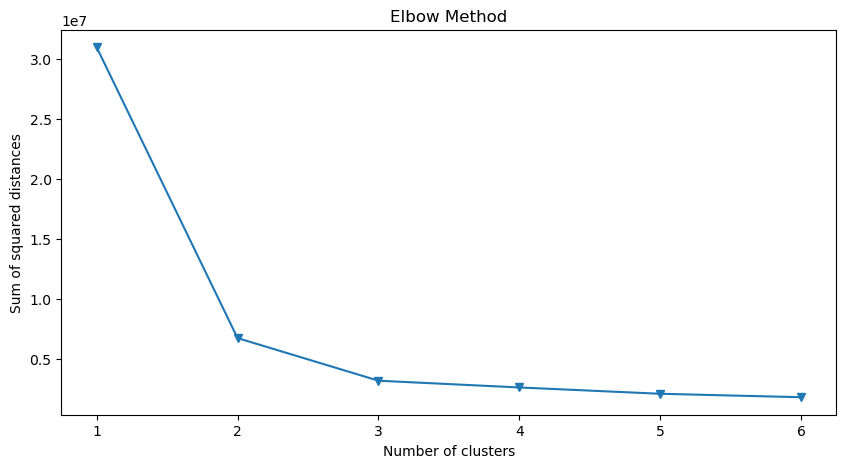

In [2129]:
#plot the graph
plt.figure(figsize = (10,5))
plt.plot(range(1, 7), clustersxm, marker = 'v' )
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

In [2130]:
#declare the kmeans clustering and use 3 clusters as indicated on the grapg
kmeans = KMeans(n_clusters = 3, random_state = 0)

In [2131]:
#get your prediction
clust_prediction = kmeans.fit_predict(x_clut_scaled)

In [2132]:
#add the cluster prediction to the dataset
clusters['clustered'] = clust_prediction

In [2133]:
clusters

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating,clustered
0,Sports,0.60,0.275,0.10,0.075,4.413262,76.0,51.0,7.562431,50.0,E,0
1,Platform,0.60,0.275,0.10,0.075,3.694962,1.0,1.0,7.125046,0.0,Unavailable,0
2,Racing,0.60,0.275,0.10,0.075,3.570196,82.0,51.0,7.562431,50.0,E,0
3,Sports,0.60,0.275,0.10,0.075,3.489613,80.0,51.0,7.562431,50.0,E,0
4,Role-Playing,0.60,0.275,0.10,0.075,3.445952,1.0,1.0,7.125046,0.0,Unavailable,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16712,Action,0.00,0.000,0.01,0.000,-4.605070,1.0,1.0,7.125046,0.0,Unavailable,1
16713,Sports,0.00,0.010,0.00,0.000,-4.605070,1.0,1.0,7.125046,0.0,Unavailable,1
16714,Adventure,0.00,0.000,0.01,0.000,-4.605070,1.0,1.0,7.125046,0.0,Unavailable,1
16715,Platform,0.01,0.000,0.00,0.000,-4.605070,1.0,1.0,7.125046,0.0,Unavailable,1


In [2134]:
#select column header
clust_num = clusters.select_dtypes(include='number').columns.tolist()
clust_num

['NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales',
 'Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count',
 'clustered']

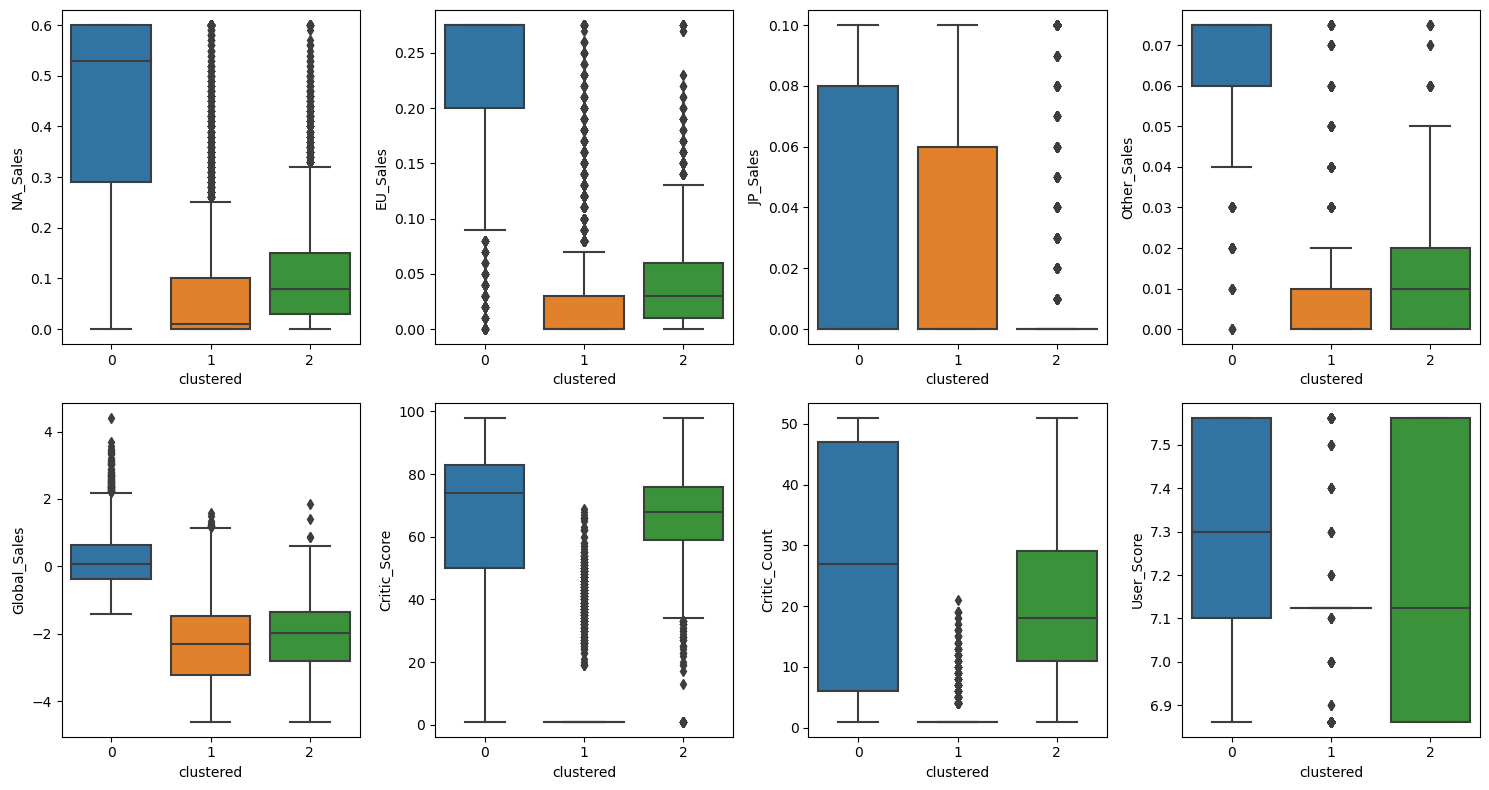

In [2135]:
#plot the boxplot to show how the clustered are grouped
rownumber = 2
colnumber = 4
clust_num = clusters.select_dtypes(include='number').columns.tolist()
fig, ax = plt.subplots(rownumber, colnumber, figsize=(15, 8))

forcounter = 0 
for num in range(rownumber):
    for num1 in range(colnumber):
        sns.boxplot(ax=ax[num, num1], x=clusters['clustered'], y=clusters[clust_num[forcounter]])
        forcounter += 1

fig.tight_layout()
plt.show()


In [2136]:
#clust_prediction
# Using the Genre as the y true target for the internal and external metric of the clustering
y_true = clusters['Genre']
v_measure = v_measure_score(y_true, clust_prediction)
randscore = adjusted_rand_score(y_true, clust_prediction)
mutualinfo = adjusted_mutual_info_score(y_true, clust_prediction)
davbo = davies_bouldin_score(x_clut_scaled, clust_prediction)
culscore = silhouette_score(x_clut_scaled, clust_prediction)
chscore = calinski_harabasz_score(x_clut_scaled, clust_prediction)


print("------ External Metrics------Using Genre------")
print(f'V-measure score: {v_measure:.3f}')
print(f'Adjusted_rand_score: {randscore:.3f}')
print(f'Adjusted_mutual_info_score: {mutualinfo:.3f}')

print('------------Internal Evaluation Metrics-----Using Genre-------')
print(f'davies_bouldin_score {davbo:.3f}')
print(f'Silhouette Coefficient: {culscore:.3f}')
print(f'Calinski Harabasz Score: {chscore:.3f}')

------ External Metrics------Using Genre------
V-measure score: 0.022
Adjusted_rand_score: 0.007
Adjusted_mutual_info_score: 0.022
------------Internal Evaluation Metrics-----Using Genre-------
davies_bouldin_score 1.395
Silhouette Coefficient: 0.308
Calinski Harabasz Score: 7492.901


In [2137]:
# Using the Rating as the y true target for the internal and external metric of the clustering
y_true = clusters['Rating']
v_measure = v_measure_score(y_true, clust_prediction)
randscore = adjusted_rand_score(y_true, clust_prediction)
mutualinfo = adjusted_mutual_info_score(y_true, clust_prediction)
davbo = davies_bouldin_score(x_clut_scaled, clust_prediction)
culscore = silhouette_score(x_clut_scaled, clust_prediction)
chscore = calinski_harabasz_score(x_clut_scaled, clust_prediction)


print("------ External Metrics--Using ----Rating---------")
print(f'V-measure score: {v_measure:.3f}')
print(f'Adjusted_rand_score: {randscore:.3f}')
print(f'Adjusted_mutual_info_score: {mutualinfo:.3f}')

print('------------Internal Evaluation Metrics---Using Rating---------')
print(f'davies_bouldin_score {davbo:.3f}')
print(f'Silhouette Coefficient: {culscore:.3f}')
print(f'Calinski Harabasz Score: {chscore:.3f}')

------ External Metrics--Using ----Rating---------
V-measure score: 0.245
Adjusted_rand_score: 0.337
Adjusted_mutual_info_score: 0.244
------------Internal Evaluation Metrics---Using Rating---------
davies_bouldin_score 1.395
Silhouette Coefficient: 0.308
Calinski Harabasz Score: 7492.901
